# AMAZON

In [1]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# amazon_credits 변수를 만들고 credits.csv 파일의 데이터를 할당
amazon_credits = pd.read_csv('~/aiffel/amazon/credits.csv')

# amazon_credits의 head 값 확인하기
amazon_credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [2]:
# amazon_titles 변수를 만들고 titles.csv 파일의 데이터를 할당
amazon_titles = pd.read_csv('~/aiffel/amazon/titles.csv')

# amazon_titles의 head 값 확인하기
amazon_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [3]:
# amazon_titles의 정보 확인하기
amazon_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [4]:
amazon_titles.shape

(9871, 15)

In [5]:
# 컬럼별 결측치 확인
amazon_titles.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [6]:
# 각 컬럼 간 상관관계
amazon_titles.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,0.062811,-0.410655,0.034449,0.024487,0.071576,0.130082
runtime,0.062811,1.000000,-0.020426,-0.100182,0.099714,-0.026273,-0.100369
seasons,-0.410655,-0.020426,1.000000,0.004374,0.124336,0.171405,-0.041699
imdb_score,0.034449,-0.100182,0.004374,1.000000,0.165892,0.071580,0.580968
imdb_votes,0.024487,0.099714,0.124336,0.165892,1.000000,0.261946,0.146762
tmdb_popularity,0.071576,-0.026273,0.171405,0.071580,0.261946,1.000000,0.091961
tmdb_score,0.130082,-0.100369,-0.041699,0.580968,0.146762,0.091961,1.000000


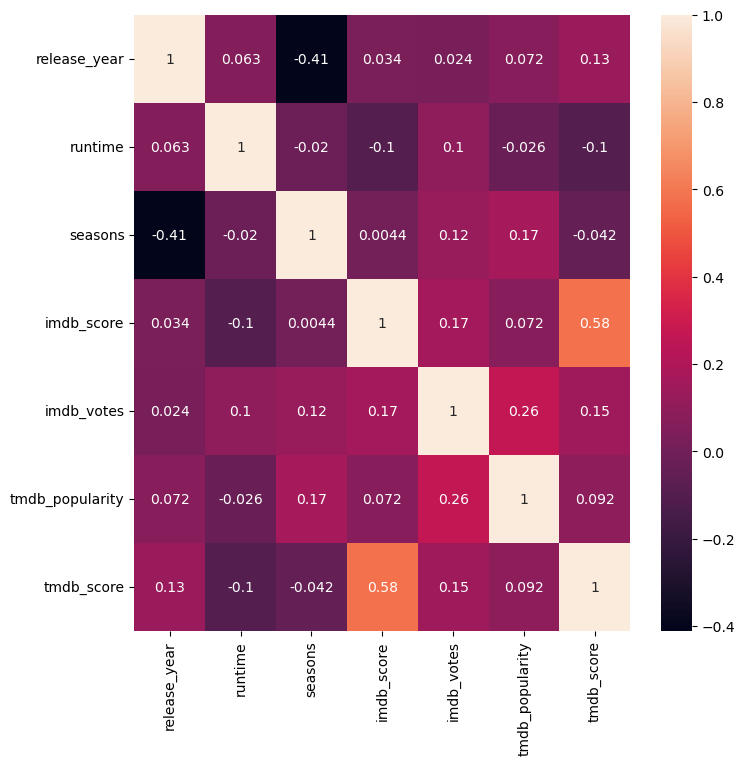

In [7]:
# 히트맵
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
sns.heatmap(amazon_titles.corr(), annot=True)
 
plt.show()

In [8]:
# 필요없는 컬럼 제거
amazon = amazon_titles.drop(['age_certification', 'production_countries', 'imdb_id', 'description'], axis=1)
amazon

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",26.0,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",NaN,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,1946,171,"['romance', 'war', 'drama']",NaN,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,1940,92,"['comedy', 'drama', 'romance']",NaN,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,1950,94,"['thriller', 'drama', 'romance']",NaN,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,2021,93,['drama'],NaN,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,2021,55,['comedy'],NaN,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,2021,116,['crime'],NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,2021,72,"['family', 'drama']",NaN,8.4,49.0,0.645,NaN


In [9]:
# seasons 컬럼은 결측치를 0으로 변경
amazon['seasons'] = amazon['seasons'].fillna(0)
print(amazon.shape)
amazon['seasons'].isnull().sum()

(9871, 11)


0

In [10]:
# imdb와 tmdb score가 둘 중 하나 NaN값인 경우 서로 채워주기
amazon['imdb_score'] = amazon['imdb_score'].fillna(amazon['tmdb_score'])

In [11]:
# imdb와 tmdb score가 둘 중 하나 NaN값인 경우 서로 채워주기
amazon['tmdb_score'] = amazon['tmdb_score'].fillna(amazon['imdb_score'])

In [12]:
# 보간 후 컬럼별 결측치 총합
amazon.isnull().sum()

id                    0
title                 0
type                  0
release_year          0
runtime               0
genres                0
seasons               0
imdb_score          552
imdb_votes         1031
tmdb_popularity     547
tmdb_score          552
dtype: int64

In [13]:
# 몇 가지 컨텐츠를 직접 imdb와 tmdb에 넣어본 결과 대체로 진짜 점수가 없는 경우가 대다수였다.
# 인기있는 컨텐츠를 뽑을 때 score들이 없는 컨텐츠는 그만큼 인기가 없는 것이라 판단하고 결측치 제거
amazon = amazon.dropna(subset=['imdb_score', 'tmdb_score']).reset_index(drop=True)
print(amazon.shape)
amazon.isnull().sum()

(9319, 11)


id                   0
title                0
type                 0
release_year         0
runtime              0
genres               0
seasons              0
imdb_score           0
imdb_votes         479
tmdb_popularity    328
tmdb_score           0
dtype: int64

In [14]:
amazon

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",26.0,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",0.0,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,1946,171,"['romance', 'war', 'drama']",0.0,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,1940,92,"['comedy', 'drama', 'romance']",0.0,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,1950,94,"['thriller', 'drama', 'romance']",0.0,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...
9314,tm1049635,Devineni,MOVIE,2021,122,['drama'],0.0,8.4,1188.0,0.945,8.4
9315,tm1078263,Good Boys for Life,MOVIE,2021,73,"['comedy', 'drama']",0.0,3.9,50.0,2.076,3.9
9316,tm822572,Gun and a Hotel Bible,MOVIE,2021,58,['drama'],0.0,4.0,142.0,0.954,6.5
9317,tm510327,Lily Is Here,MOVIE,2021,93,['drama'],0.0,5.3,20.0,1.406,5.3


In [15]:
# imdb score 상위 10개
top_imdbscore=amazon.sort_values('imdb_score',ascending=False)
top_imdbscore.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
6871,tm1045918,Rise Of The Great White Shark,MOVIE,2017,49,[],0.0,10.0,NaN,0.629,10.0
9224,tm1031868,Memories of Reality,MOVIE,2021,98,"['drama', 'thriller']",0.0,10.0,NaN,1.106,10.0
8534,ts224668,61st Street,SHOW,2022,45,"['drama', 'crime', 'thriller']",2.0,10.0,NaN,20.664,10.0
7843,ts235753,Wild and Free: Florianópolis,SHOW,2020,42,['reality'],2.0,10.0,NaN,4.319,10.0
3652,tm202801,John Denver - Rocky Mountain High,MOVIE,2003,74,[],0.0,10.0,NaN,0.625,10.0
7867,ts255472,Alejandro Sanz: #Lagira de #eldisco,SHOW,2019,87,['music'],1.0,10.0,NaN,0.937,10.0
5077,tm416965,John Wesley: The Faith That Sparked the Method...,MOVIE,2014,55,[],0.0,10.0,NaN,0.600,10.0
8251,tm987059,"Iván Marín, ¿por qué carajos?",MOVIE,2020,69,['comedy'],0.0,10.0,NaN,1.509,10.0
2161,tm850539,COINTELPRO: The FBI's War on Black America,MOVIE,1990,53,[],0.0,10.0,NaN,1.164,10.0
8258,tm460159,"Barry Brewer: Chicago, I'm Home",MOVIE,2019,78,['comedy'],0.0,10.0,NaN,1.385,10.0


In [16]:
# 결측치 처리 전 imdb score 상위 10개
before_top_imdbscore=amazon_titles.sort_values('imdb_score',ascending=False)
before_top_imdbscore.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9135,tm1159926,Pawankhind,MOVIE,The story of the Maratha Warriors at the battl...,2022,NaN,153,"['action', 'drama', 'history']",['IN'],NaN,tt14448632,9.9,2036.0,3.812,8.5
7783,ts231725,Water Helps the Blood Run,SHOW,"Five orphan girls from diverse backgrounds, ca...",2019,NaN,29,"['drama', 'comedy']",[],1.0,tt11524214,9.7,30.0,NaN,NaN
9108,ts304299,Couple of Mirrors,SHOW,"You Yi is a young, innocent, and kind-hearted ...",2021,NaN,46,"['drama', 'romance', 'crime']",['CN'],1.0,tt15509598,9.5,99.0,5.116,8.0
7422,ts86600,The Chosen,SHOW,The life of Christ through the eyes of those w...,2019,TV-G,47,"['drama', 'history']",['US'],2.0,tt9471404,9.4,25538.0,30.771,9.4
9423,tm1167998,Tari Sathe,MOVIE,The story revolves between two youngsters who ...,2021,NaN,119,"['drama', 'family']",['IN'],NaN,tt13181612,9.4,517.0,0.821,7.0
5113,ts151280,Subaru Launch Control,SHOW,Go behind closed doors with Subaru Motorsports...,2013,NaN,21,['sport'],[],4.0,tt3923326,9.3,30.0,0.600,NaN
9573,tm1062504,Pazhagiya Naatkal,MOVIE,NaN,2021,NaN,127,['drama'],[],NaN,tt14747784,9.3,58.0,NaN,NaN
9052,tm1108724,Jai Bhim,MOVIE,A pregnant woman from a primitive tribal commu...,2021,NaN,164,"['drama', 'crime']",['IN'],NaN,tt15097216,9.3,175187.0,6.051,7.4
6358,ts77883,Surgeons: At the Edge of Life,SHOW,Documentary series going beyond the theatre do...,2018,NaN,59,['documentation'],['GB'],4.0,tt7860280,9.2,96.0,1.519,8.0
7858,tm810763,Soorarai Pottru,MOVIE,"Nedumaaran Rajangam ""Maara"" sets out to make t...",2020,NaN,149,"['drama', 'action']",['IN'],NaN,tt10189514,9.2,109759.0,4.146,7.9


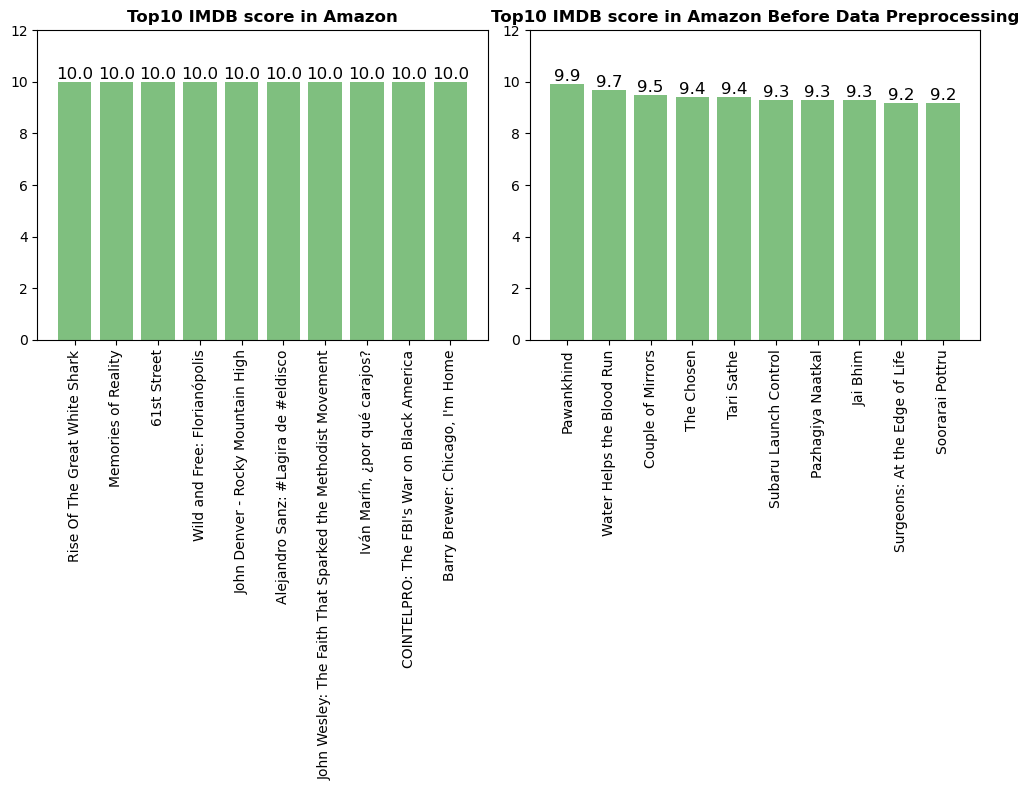

In [17]:
fig = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
# imdb scores 상위 10개 그래프(수치 표시)
x = top_imdbscore.head(10)['title']
y = top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Amazon",fontweight="bold")

plt.subplot(1,2,2)
# 결측치 제거 전 imdb scores top 10(수치 표시)
x = before_top_imdbscore.head(10)['title']
y = before_top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Amazon Before Data Preprocessing",fontweight="bold")

plt.tight_layout()
plt.show()

In [18]:
# imdb votes 상위 10개
top_imdbvotes=amazon.sort_values('imdb_votes',ascending=False)
top_imdbvotes.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2188,tm191110,Titanic,MOVIE,1997,194,"['drama', 'romance']",0.0,7.9,1133692.0,127.413,7.9
2198,tm7320,The Usual Suspects,MOVIE,1995,106,"['thriller', 'crime', 'drama']",0.0,8.5,1059480.0,22.233,8.2
2205,tm12503,Braveheart,MOVIE,1995,177,"['drama', 'history', 'war']",0.0,8.4,1016629.0,42.208,7.9
2197,tm55542,The Sixth Sense,MOVIE,1999,107,"['thriller', 'drama']",0.0,8.2,967864.0,29.333,7.9
1795,tm163236,The Terminator,MOVIE,1984,108,"['thriller', 'action', 'scifi']",0.0,8.1,841706.0,51.819,7.6
2756,ts10620,Dexter,SHOW,2006,53,"['drama', 'thriller', 'crime']",8.0,8.7,711566.0,81.642,8.2
3983,tm72846,Skyfall,MOVIE,2012,143,"['thriller', 'action']",0.0,7.8,684779.0,62.264,7.2
2770,tm136410,District 9,MOVIE,2009,113,"['scifi', 'thriller', 'action']",0.0,7.9,670344.0,80.387,7.4
5122,tm205861,Arrival,MOVIE,2016,112,"['drama', 'scifi', 'thriller']",0.0,7.9,669220.0,67.165,7.6
2196,tm106648,Fargo,MOVIE,1996,98,"['thriller', 'crime', 'drama']",0.0,8.1,663221.0,19.393,7.9


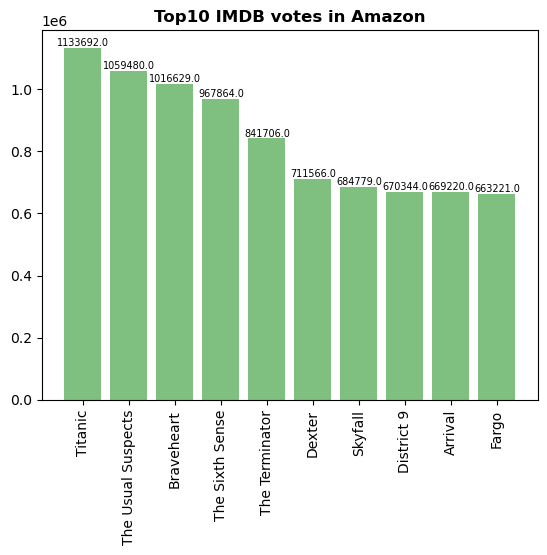

In [19]:
# imdb votes top 10(수치 표시)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['imdb_votes']
bar = plt.bar(x, y, color='green', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 7)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB votes in Amazon",fontweight="bold")

plt.show()

In [63]:
# imdb votes 상위 10개
after_top_imdbvotes=amazon_imdb.sort_values('imdb_votes',ascending=False)
after_top_imdbvotes.head(10)

,Unnamed: 0,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
2188,2220,tm191110,Titanic,MOVIE,1997,194,"['drama', 'romance']",0,7.9,1133692.0,127.413,7.9,-
2198,2230,tm7320,The Usual Suspects,MOVIE,1995,106,"['thriller', 'crime', 'drama']",0,8.5,1059480.0,22.233,8.2,-
2205,2237,tm12503,Braveheart,MOVIE,1995,177,"['drama', 'history', 'war']",0,8.4,1016629.0,42.208,7.9,-
2197,2229,tm55542,The Sixth Sense,MOVIE,1999,107,"['thriller', 'drama']",0,8.2,967864.0,29.333,7.9,-
1795,1814,tm163236,The Terminator,MOVIE,1984,108,"['thriller', 'action', 'scifi']",0,8.1,841706.0,51.819,7.6,-
2756,2810,ts10620,Dexter,SHOW,2006,53,"['drama', 'thriller', 'crime']",8,8.7,711566.0,81.642,8.2,-
3983,4102,tm72846,Skyfall,MOVIE,2012,143,"['thriller', 'action']",0,7.8,684779.0,62.264,7.2,-
2770,2824,tm136410,District 9,MOVIE,2009,113,"['scifi', 'thriller', 'action']",0,7.9,670344.0,80.387,7.4,-
5122,5293,tm205861,Arrival,MOVIE,2016,112,"['drama', 'scifi', 'thriller']",0,7.9,669220.0,67.165,7.6,-
2196,2228,tm106648,Fargo,MOVIE,1996,98,"['thriller', 'crime', 'drama']",0,8.1,663221.0,19.393,7.9,-


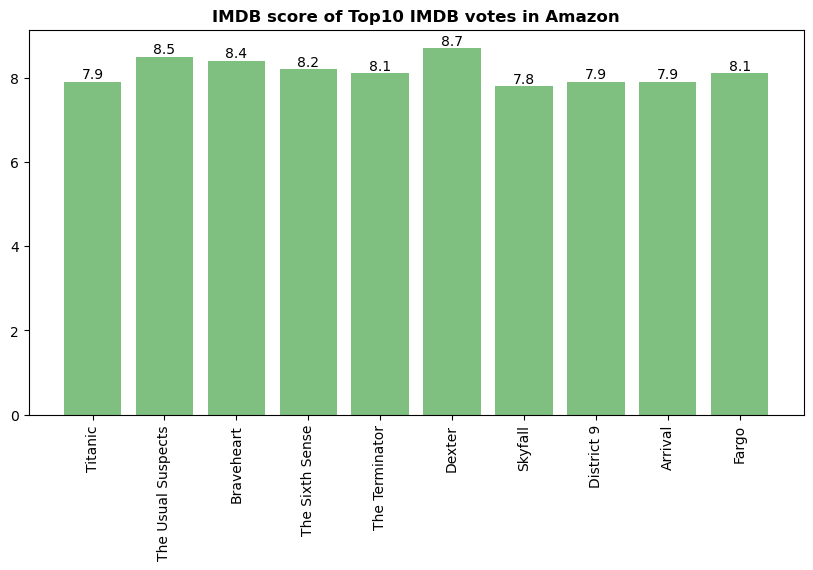

In [67]:
fig = plt.figure(figsize=(10,5))

# imdb votes top 10에 따른 imdb score
x = after_top_imdbvotes.head(10)['title']
y = after_top_imdbvotes.head(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)
    
plt.xticks(rotation=90)
plt.title("IMDB score of Top10 IMDB votes in Amazon",fontweight="bold")

plt.show()

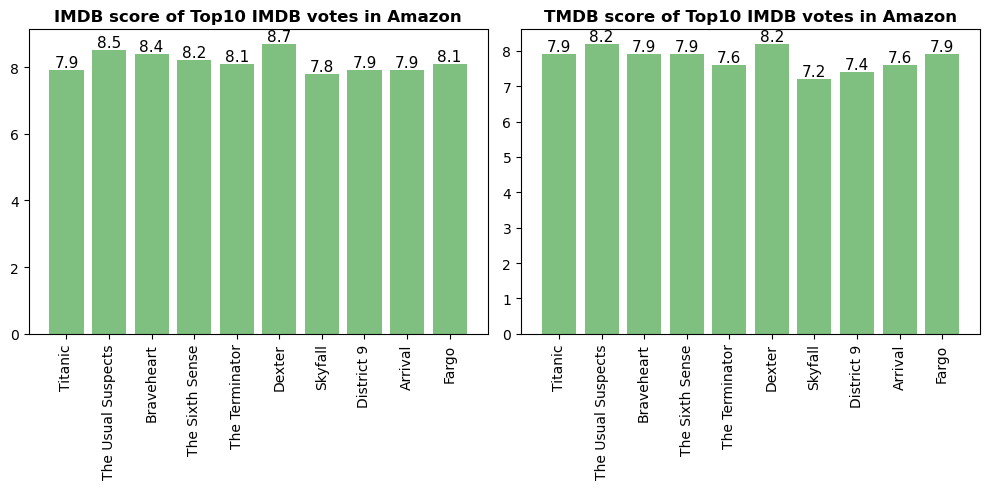

In [20]:
fig = plt.figure(figsize=(10,5))

# 상위 10개의 IMDB votes에 해당하는 컨텐츠의 IMDB score
plt.subplot(1,2,1)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
    
plt.xticks(rotation=90)
plt.title("IMDB score of Top10 IMDB votes in Amazon",fontweight="bold")

# 상위 10개의 IMDB votes에 해당하는 컨텐츠의 TMDB score
plt.subplot(1,2,2)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
    
plt.xticks(rotation=90)
plt.title("TMDB score of Top10 IMDB votes in Amazon",fontweight="bold")

plt.tight_layout()
plt.show()

In [21]:
# tmdb popularity 상위 10개
top_tmdbpopularity=amazon.sort_values('tmdb_popularity',ascending=False)
top_tmdbpopularity.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
8523,tm266536,All the Old Knives,MOVIE,2022,101,['thriller'],0.0,6.1,14686.0,1437.906,6.0
8625,ts331561,Harina,SHOW,2022,33,['comedy'],1.0,7.8,509.0,951.863,5.5
8624,tm1188007,The eighth clause,MOVIE,2022,80,['thriller'],0.0,4.1,NaN,950.986,4.1
8552,tm460828,Hotel Transylvania: Transformania,MOVIE,2022,87,"['fantasy', 'romance', 'animation', 'comedy', ...",0.0,6.0,26244.0,934.545,7.1
7138,tm374139,Sonic the Hedgehog,MOVIE,2020,99,"['scifi', 'action', 'comedy', 'family', 'fanta...",0.0,6.5,126887.0,893.650,7.4
8537,tm460993,Clifford the Big Red Dog,MOVIE,2021,97,"['fantasy', 'comedy', 'family', 'animation', '...",0.0,5.9,11522.0,482.744,7.3
8674,tm1042364,Queen of Spades,MOVIE,2021,91,['horror'],0.0,3.6,631.0,429.802,6.2
8596,tm943374,Meander,MOVIE,2021,91,"['horror', 'thriller', 'drama', 'scifi']",0.0,5.6,7782.0,389.431,6.0
3980,ts22277,Suits,SHOW,2011,44,"['drama', 'comedy']",9.0,8.5,395600.0,356.533,8.1
5116,ts8,Better Call Saul,SHOW,2015,49,"['comedy', 'drama', 'crime']",6.0,8.8,404920.0,352.657,8.5


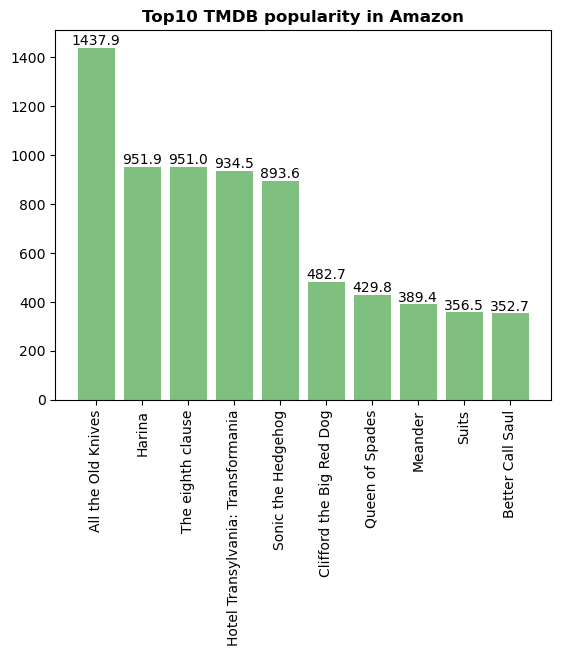

In [22]:
# tmdb popularity top 10(수치 표시)
x = top_tmdbpopularity.head(10)['title']
y = top_tmdbpopularity.head(10)['tmdb_popularity']
bar = plt.bar(x, y, color='green', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 10)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB popularity in Amazon",fontweight="bold")

plt.show()

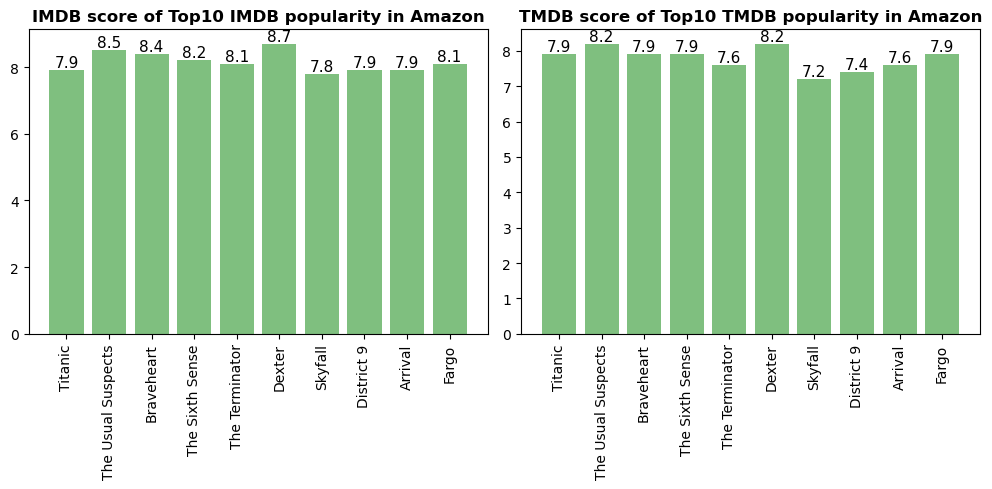

In [23]:
fig = plt.figure(figsize=(10,5))

# 상위 10개의 TMDB popularity에 해당하는 컨텐츠의 IMDB score
plt.subplot(1,2,1)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
    
plt.xticks(rotation=90)
plt.title("IMDB score of Top10 IMDB popularity in Amazon",fontweight="bold")

# 상위 10개의 TMDB popularity에 해당하는 컨텐츠의 TMDB score
plt.subplot(1,2,2)
x = top_imdbvotes.head(10)['title']
y = top_imdbvotes.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 11)
    
plt.xticks(rotation=90)
plt.title("TMDB score of Top10 TMDB popularity in Amazon",fontweight="bold")

plt.tight_layout()
plt.show()

In [24]:
# tmdb score 상위 10개
top_tmdbscore=amazon.sort_values('tmdb_score',ascending=False)
top_tmdbscore.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
8671,tm1106016,Dogtown 2,MOVIE,2022,62,"['family', 'animation']",0.0,3.2,32.0,2.589,10.0
8790,tm960023,Thomas Sowell: Common Sense in a Senseless Wor...,MOVIE,2021,56,['documentation'],0.0,8.3,341.0,1.211,10.0
4784,tm144614,The Who Sensation: The Story of Tommy,MOVIE,2014,113,"['documentation', 'music']",0.0,7.7,182.0,1.313,10.0
1723,tm446269,Deya Neya,MOVIE,1963,120,['drama'],0.0,8.1,359.0,0.871,10.0
8251,tm987059,"Iván Marín, ¿por qué carajos?",MOVIE,2020,69,['comedy'],0.0,10.0,NaN,1.509,10.0
4234,tm173189,Alonzo Bodden: Who's Paying Attention,MOVIE,2011,61,['comedy'],0.0,7.1,155.0,1.515,10.0
4595,ts79904,Secrets of the Castle,SHOW,2014,57,"['reality', 'documentation']",1.0,8.6,308.0,1.563,10.0
8258,tm460159,"Barry Brewer: Chicago, I'm Home",MOVIE,2019,78,['comedy'],0.0,10.0,NaN,1.385,10.0
8267,tm487754,Like Blood,MOVIE,2019,81,"['crime', 'drama', 'european']",0.0,6.6,15.0,0.600,10.0
5797,tm240717,Savitri,MOVIE,2016,128,"['romance', 'comedy', 'drama', 'family']",0.0,5.7,91.0,0.600,10.0


In [25]:
# 결측치 처리 전 tmdb votes 상위 10개
before_top_tmdbscore=amazon.sort_values('tmdb_score',ascending=False)
before_top_tmdbscore.head(10)

,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
8671,tm1106016,Dogtown 2,MOVIE,2022,62,"['family', 'animation']",0.0,3.2,32.0,2.589,10.0
8790,tm960023,Thomas Sowell: Common Sense in a Senseless Wor...,MOVIE,2021,56,['documentation'],0.0,8.3,341.0,1.211,10.0
4784,tm144614,The Who Sensation: The Story of Tommy,MOVIE,2014,113,"['documentation', 'music']",0.0,7.7,182.0,1.313,10.0
1723,tm446269,Deya Neya,MOVIE,1963,120,['drama'],0.0,8.1,359.0,0.871,10.0
8251,tm987059,"Iván Marín, ¿por qué carajos?",MOVIE,2020,69,['comedy'],0.0,10.0,NaN,1.509,10.0
4234,tm173189,Alonzo Bodden: Who's Paying Attention,MOVIE,2011,61,['comedy'],0.0,7.1,155.0,1.515,10.0
4595,ts79904,Secrets of the Castle,SHOW,2014,57,"['reality', 'documentation']",1.0,8.6,308.0,1.563,10.0
8258,tm460159,"Barry Brewer: Chicago, I'm Home",MOVIE,2019,78,['comedy'],0.0,10.0,NaN,1.385,10.0
8267,tm487754,Like Blood,MOVIE,2019,81,"['crime', 'drama', 'european']",0.0,6.6,15.0,0.600,10.0
5797,tm240717,Savitri,MOVIE,2016,128,"['romance', 'comedy', 'drama', 'family']",0.0,5.7,91.0,0.600,10.0


/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_10787/2117661607.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


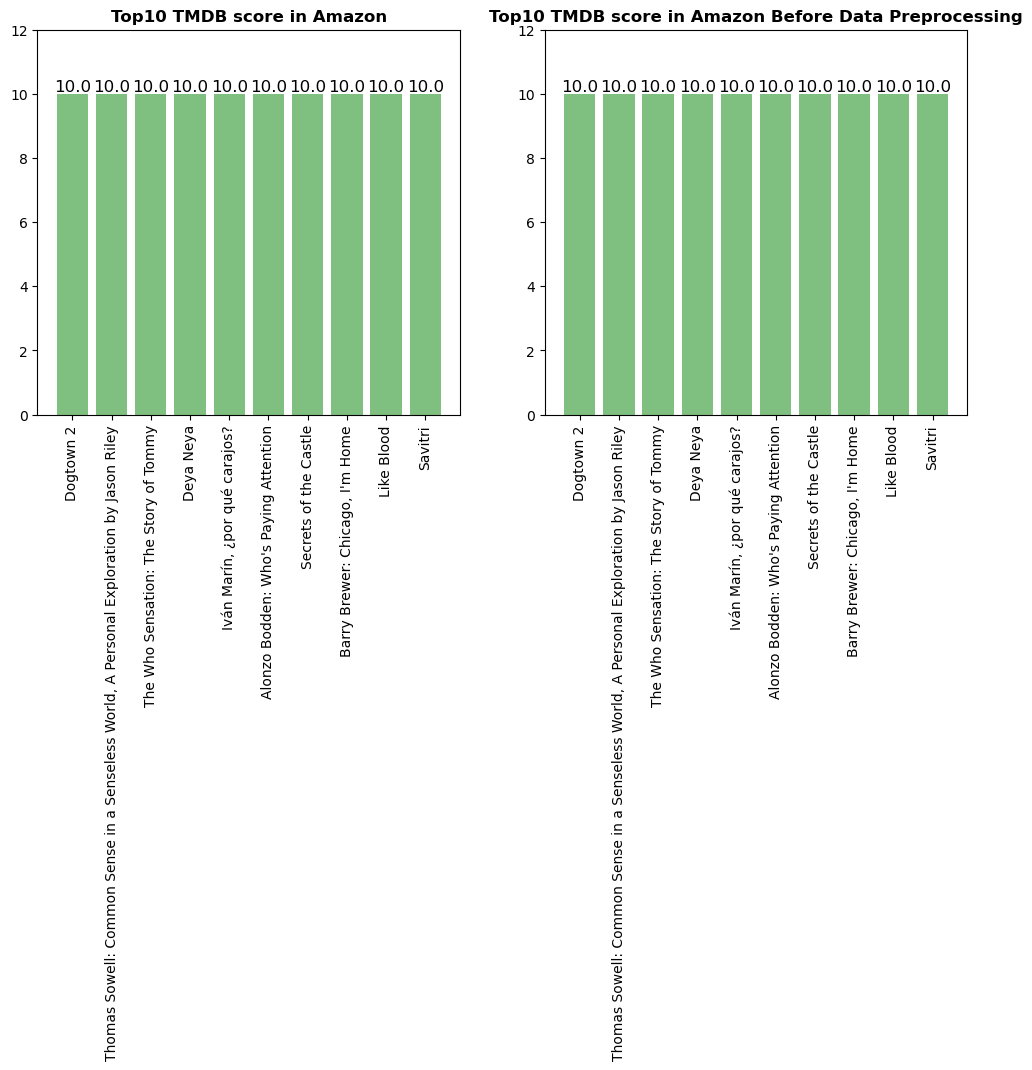

In [26]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# tmdb scores top 10(수치 표시)
x = top_tmdbscore.head(10)['title']
y = top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Amazon",fontweight="bold")



plt.subplot(1,2,2)
# 결측치 제거 전 tmdb scores top 10(수치 표시)
x = before_top_tmdbscore.head(10)['title']
y = before_top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Amazon Before Data Preprocessing",fontweight="bold")

plt.tight_layout()
plt.show()

---------

In [54]:
# amazon_tmdb 변수를 만들고 a_tmdb_to_imdb.csv 파일의 데이터를 할당
amazon_tmdb = pd.read_csv('/Users/soy/aiffel/amazon/a_imdb_to_tmdb.csv', encoding='ISO-8859-1')

# amazon_tmdb의 head 값 확인하기
amazon_tmdb.head()

,Unnamed: 0,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
0,0,ts20945,The Three Stooges,SHOW,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",26,8.6,1092.0,15.424,7.6,-
1,1,tm19248,The General,MOVIE,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",0,8.2,89766.0,8.647,8.0,-
2,2,tm82253,The Best Years of Our Lives,MOVIE,1946,171,"['romance', 'war', 'drama']",0,8.1,63026.0,8.435,7.8,-
3,3,tm83884,His Girl Friday,MOVIE,1940,92,"['comedy', 'drama', 'romance']",0,7.8,57835.0,11.270,7.4,-
4,4,tm56584,In a Lonely Place,MOVIE,1950,94,"['thriller', 'drama', 'romance']",0,7.9,30924.0,8.273,7.6,-


In [55]:
# amazon_imdb 변수를 만들고 a_tmdb_to_imdb.csv 파일의 데이터를 할당
amazon_imdb = pd.read_csv('/Users/soy/aiffel/amazon/a_tmdb_to_imdb.csv', encoding='ISO-8859-1')

# amazon_imdb의 head 값 확인하기
amazon_imdb.head()

,Unnamed: 0,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
0,0,ts20945,The Three Stooges,SHOW,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",26,8.6,1092.0,15.424,7.6,-
1,1,tm19248,The General,MOVIE,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",0,8.2,89766.0,8.647,8.0,-
2,2,tm82253,The Best Years of Our Lives,MOVIE,1946,171,"['romance', 'war', 'drama']",0,8.1,63026.0,8.435,7.8,-
3,3,tm83884,His Girl Friday,MOVIE,1940,92,"['comedy', 'drama', 'romance']",0,7.8,57835.0,11.270,7.4,-
4,4,tm56584,In a Lonely Place,MOVIE,1950,94,"['thriller', 'drama', 'romance']",0,7.9,30924.0,8.273,7.6,-


In [56]:
# imdb NaN값인 경우 prediction으로 채워주기
amazon_imdb['imdb_score'] = amazon_imdb['imdb_score'].fillna(amazon_imdb['prediction'])
amazon_imdb.tail(10)

,Unnamed: 0,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
9309,9855,tm1084430,Parigettu Parigettu,MOVIE,2021,130,"['thriller', 'crime']",0,7.3,1292.0,NaN,NaN,-
9310,9856,tm1019060,Anbirkiniyal,MOVIE,2021,118,"['thriller', 'drama']",0,6.8,361.0,2.191,7.0,-
9311,9859,ts273173,Exquisite Wolf Heart,SHOW,2021,46,['drama'],1,5.95158,NaN,12.879,6.0,5.95158
9312,9860,tm1090675,Burning Man: The Musical,MOVIE,2021,74,[],0,7.4,231.0,0.600,NaN,-
9313,9861,tm1142918,Ty Barnett: Yep,MOVIE,2021,25,[],0,5.84994,NaN,0.600,5.8,5.84994
9314,9862,tm1049635,Devineni,MOVIE,2021,122,['drama'],0,8.4,1188.0,0.945,NaN,-
9315,9863,tm1078263,Good Boys for Life,MOVIE,2021,73,"['comedy', 'drama']",0,3.9,50.0,2.076,NaN,-
9316,9864,tm822572,Gun and a Hotel Bible,MOVIE,2021,58,['drama'],0,4.0,142.0,0.954,6.5,-
9317,9866,tm510327,Lily Is Here,MOVIE,2021,93,['drama'],0,5.3,20.0,1.406,NaN,-
9318,9869,tm1054116,Baikunth,MOVIE,2021,72,"['family', 'drama']",0,8.4,49.0,0.645,NaN,-


In [30]:
# tmdb NaN값인 경우 prediction으로 채워주기
amazon_tmdb['tmdb_score'] = amazon_tmdb['tmdb_score'].fillna(amazon_tmdb['prediction'])
amazon_tmdb

,Unnamed: 0,id,title,type,release_year,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,prediction
0,0,ts20945,The Three Stooges,SHOW,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",26,8.6,1092.0,15.424,7.6,-
1,1,tm19248,The General,MOVIE,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",0,8.2,89766.0,8.647,8.0,-
2,2,tm82253,The Best Years of Our Lives,MOVIE,1946,171,"['romance', 'war', 'drama']",0,8.1,63026.0,8.435,7.8,-
3,3,tm83884,His Girl Friday,MOVIE,1940,92,"['comedy', 'drama', 'romance']",0,7.8,57835.0,11.270,7.4,-
4,4,tm56584,In a Lonely Place,MOVIE,1950,94,"['thriller', 'drama', 'romance']",0,7.9,30924.0,8.273,7.6,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,9862,tm1049635,Devineni,MOVIE,2021,122,['drama'],0,8.4,1188.0,0.945,7.57637,7.57637
9315,9863,tm1078263,Good Boys for Life,MOVIE,2021,73,"['comedy', 'drama']",0,3.9,50.0,2.076,4.64785,4.64785
9316,9864,tm822572,Gun and a Hotel Bible,MOVIE,2021,58,['drama'],0,4.0,142.0,0.954,6.5,-
9317,9866,tm510327,Lily Is Here,MOVIE,2021,93,['drama'],0,5.3,20.0,1.406,5.55894,5.55894


In [52]:
# imdb score 하위 10개
after_top_imdbscore=amazon_imdb.sort_values('imdb_score',ascending=False)
after_top_imdbscore.head(10)

TypeError: '<' not supported between instances of 'str' and 'float'

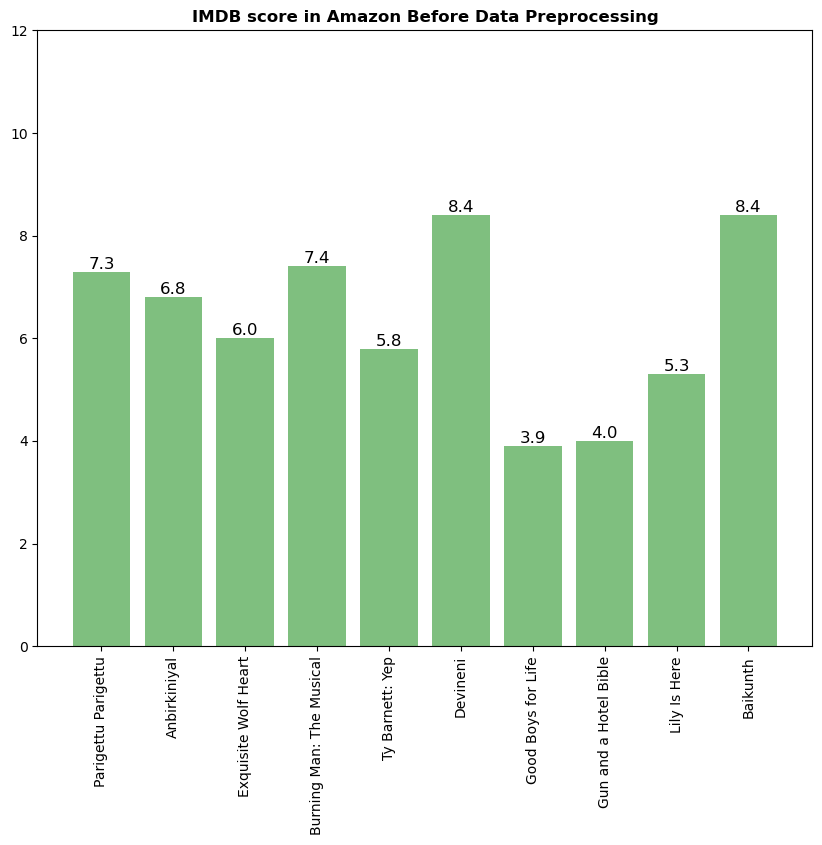

In [59]:
fig = plt.figure(figsize=(10,8))

x = amazon.tail(10)['title']
y = amazon.tail(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB score in Amazon Before Data Preprocessing",fontweight="bold")

plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U7')) -> None

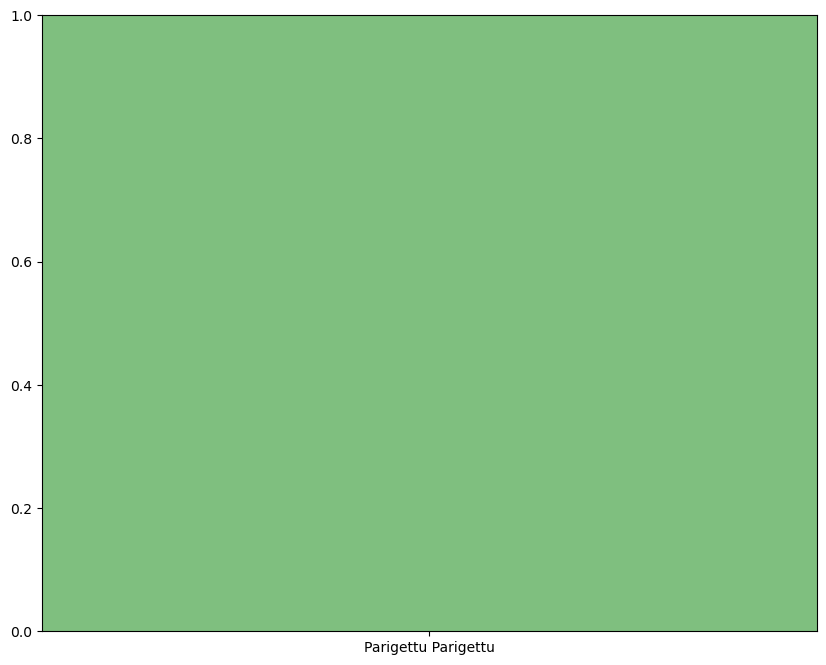

In [60]:
fig = plt.figure(figsize=(10,8))

x = amazon_imdb.tail(10)['title']
y = amazon_imdb.tail(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("IMDB score in Amazon After Data Preprocessing using Prediction",fontweight="bold")

plt.show()

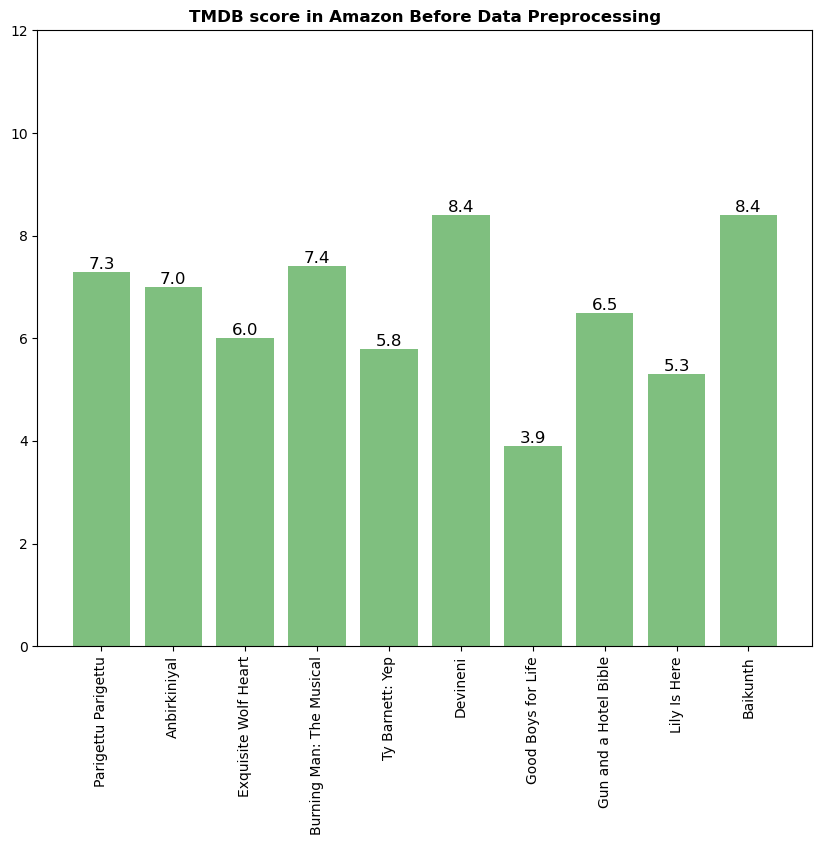

In [44]:
fig = plt.figure(figsize=(10,8))

x = amazon.tail(10)['title']
y = amazon.tail(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("TMDB score in Amazon Before Data Preprocessing",fontweight="bold")

plt.show()

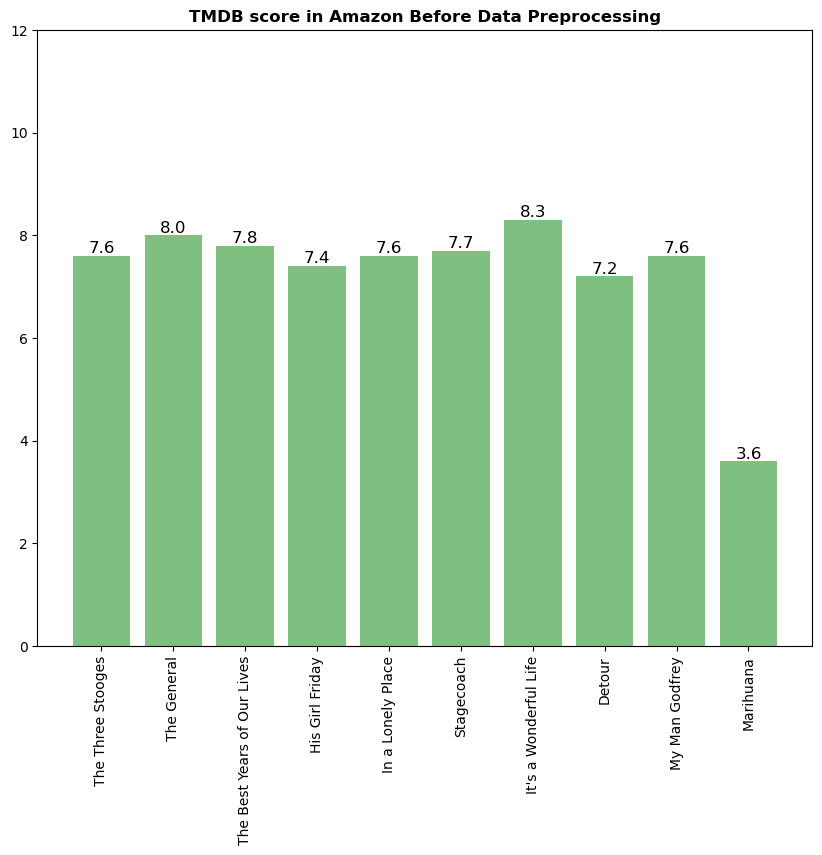

In [50]:
fig = plt.figure(figsize=(10,8))

x = amazon_tmdb.head(10)['title']
y = amazon_tmdb.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("TMDB score in Amazon Before Data Preprocessing",fontweight="bold")

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))

x = top_imdbscore.head(10)['title']
y = top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Amazon",fontweight="bold")

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))

x = after_top_imdbscore.head(10)['title']
y = after_top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Amazon After Data Preprocessing",fontweight="bold")

plt.show()

In [ ]:
# tmdb score 상위 10개
after_top_tmdbscore=amazon_tmdb.sort_values('tmdb_score',ascending=False)
after_top_tmdbscore.head(10)

In [ ]:
fig = plt.figure(figsize=(10,8))

x = before_top_tmdbscore.head(10)['title']
y = before_top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Amazon Before Data Preprocessing",fontweight="bold")

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))

x = top_imdbscore.head(10)['title']
y = top_imdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Amazon",fontweight="bold")

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,8))

x = after_top_tmdbscore.head(10)['title']
y = after_top_tmdbscore.head(10)['tmdb_score']
bar = plt.bar(x, y, color='green', alpha=0.5)
plt.ylim(0, 12)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 TMDB score in Amazon After Data Preprocessing",fontweight="bold")

plt.show()

In [51]:
print(amazon.shape) # 점수 끌어다가 보간한 것
amazon = amazon.sort_values(ascending=True)
print(amazon_tmdb.shape) # prediction
amazon_tmdb = amazon_tmdb.sort_values(ascending=True)

(9319, 11)


TypeError: sort_values() missing 1 required positional argument: 'by'

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(disney_interpol_1.values, label='interpolation')
plt.plot(disney_interpol_2.values, label = 'prediction')
plt.legend()